<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is03_3layerNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3layer neural network

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [19]:
# Create two "C" shaped datasets
def generate_c_shape_data():
    np.random.seed(0)
    N = 100  # Number of points per class
    t = np.linspace(0, np.pi, N)

    # Class 1
    X1 = np.array([np.sin(t), np.cos(t)]).T + np.random.randn(N, 2) * 0.1
    # Class 2 (Shifted C)
    X2 = np.array([-np.sin(t), -np.cos(t)]).T + np.array([0.5, -0.5]) + np.random.randn(N, 2) * 0.1

    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(N), np.ones(N))).reshape(-1, 1)

    return X, y

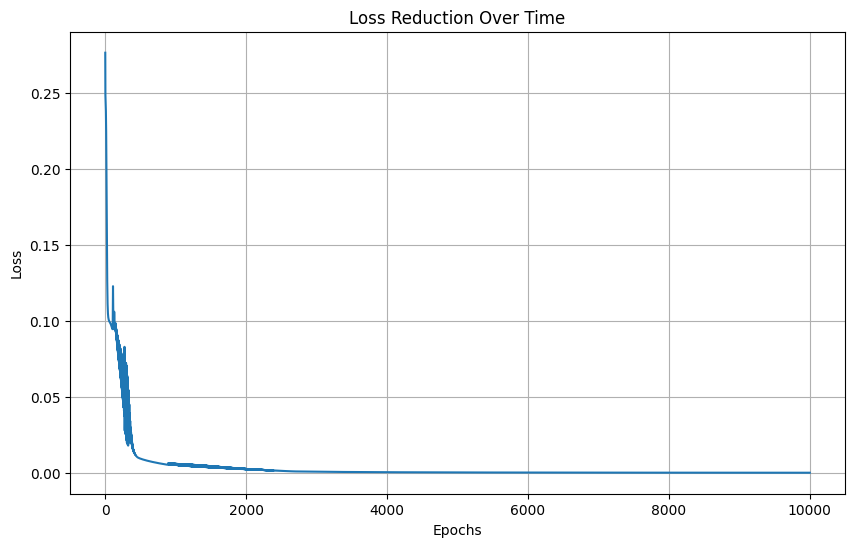

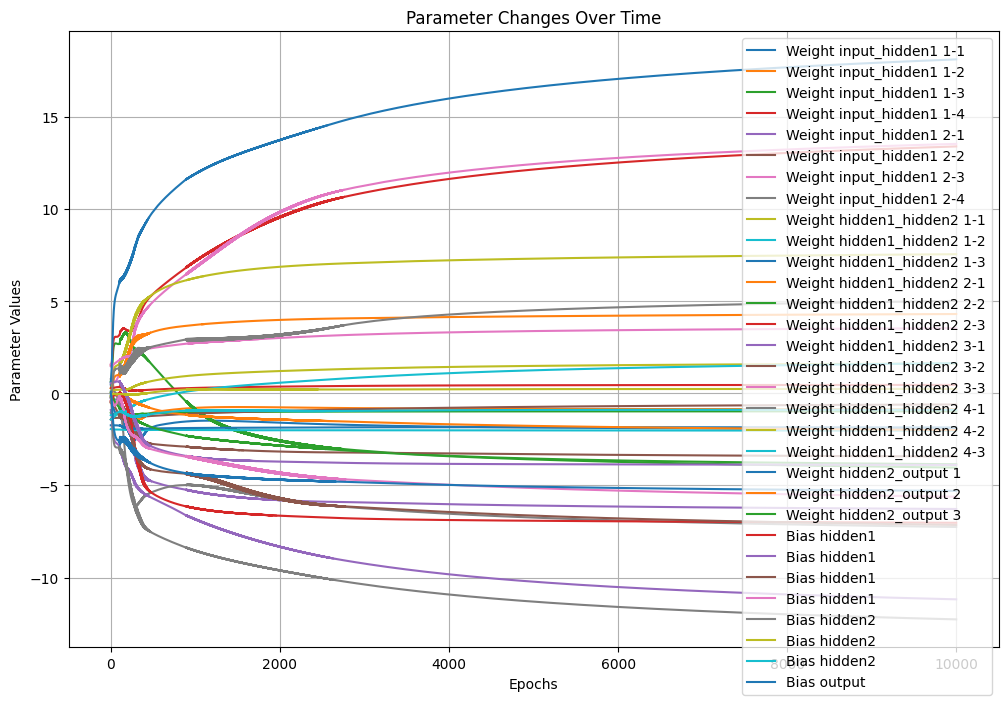

In [20]:
# Generate the dataset
X, y = generate_c_shape_data()

# Initialize weights and biases for 3-layer neural network
np.random.seed(42)
input_size = 2
hidden_size_1 = 4
hidden_size_2 = 3
output_size = 1

weights_input_hidden1 = np.random.randn(input_size, hidden_size_1)
bias_hidden1 = np.random.randn(1, hidden_size_1)
weights_hidden1_hidden2 = np.random.randn(hidden_size_1, hidden_size_2)
bias_hidden2 = np.random.randn(1, hidden_size_2)
weights_hidden2_output = np.random.randn(hidden_size_2, output_size)
bias_output = np.random.randn(1, output_size)

# Hyperparameters
learning_rate = 0.1
epochs = 10000

# Store the loss and parameter changes
loss_history = []
weights_input_hidden1_history = []
weights_hidden1_hidden2_history = []
weights_hidden2_output_history = []
bias_hidden1_history = []
bias_hidden2_history = []
bias_output_history = []

# Training the neural network with backpropagation
for epoch in range(epochs):
    # Forward pass
    hidden_layer1_input = np.dot(X, weights_input_hidden1) + bias_hidden1
    hidden_layer1_output = sigmoid(hidden_layer1_input)

    hidden_layer2_input = np.dot(hidden_layer1_output, weights_hidden1_hidden2) + bias_hidden2
    hidden_layer2_output = sigmoid(hidden_layer2_input)

    final_input = np.dot(hidden_layer2_output, weights_hidden2_output) + bias_output
    y_pred = sigmoid(final_input)

    # Compute the loss (Mean Squared Error)
    loss = np.mean((y - y_pred) ** 2)
    loss_history.append(loss)

    # Backpropagation
    error_output_layer = y_pred - y
    d_output = error_output_layer * sigmoid_derivative(final_input)

    error_hidden_layer2 = d_output.dot(weights_hidden2_output.T)
    d_hidden2 = error_hidden_layer2 * sigmoid_derivative(hidden_layer2_input)

    error_hidden_layer1 = d_hidden2.dot(weights_hidden1_hidden2.T)
    d_hidden1 = error_hidden_layer1 * sigmoid_derivative(hidden_layer1_input)

    # Update the weights and biases
    weights_hidden2_output -= learning_rate * hidden_layer2_output.T.dot(d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)

    weights_hidden1_hidden2 -= learning_rate * hidden_layer1_output.T.dot(d_hidden2)
    bias_hidden2 -= learning_rate * np.sum(d_hidden2, axis=0, keepdims=True)

    weights_input_hidden1 -= learning_rate * X.T.dot(d_hidden1)
    bias_hidden1 -= learning_rate * np.sum(d_hidden1, axis=0, keepdims=True)

    # Store weights and biases for plotting
    weights_input_hidden1_history.append(weights_input_hidden1.copy())
    weights_hidden1_hidden2_history.append(weights_hidden1_hidden2.copy())
    weights_hidden2_output_history.append(weights_hidden2_output.copy())
    bias_hidden1_history.append(bias_hidden1.copy())
    bias_hidden2_history.append(bias_hidden2.copy())
    bias_output_history.append(bias_output.copy())

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Loss Reduction Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot parameter changes over epochs
weights_input_hidden1_history = np.array(weights_input_hidden1_history)
weights_hidden1_hidden2_history = np.array(weights_hidden1_hidden2_history)
weights_hidden2_output_history = np.array(weights_hidden2_output_history)
bias_hidden1_history = np.array(bias_hidden1_history)
bias_hidden2_history = np.array(bias_hidden2_history)
bias_output_history = np.array(bias_output_history)

plt.figure(figsize=(12, 8))
for i in range(input_size):
    for j in range(hidden_size_1):
        plt.plot(weights_input_hidden1_history[:, i, j], label=f'Weight input_hidden1 {i+1}-{j+1}')
for i in range(hidden_size_1):
    for j in range(hidden_size_2):
        plt.plot(weights_hidden1_hidden2_history[:, i, j], label=f'Weight hidden1_hidden2 {i+1}-{j+1}')
for i in range(hidden_size_2):
    plt.plot(weights_hidden2_output_history[:, i, 0], label=f'Weight hidden2_output {i+1}')
plt.plot(bias_hidden1_history[:, 0, :], label='Bias hidden1')
plt.plot(bias_hidden2_history[:, 0, :], label='Bias hidden2')
plt.plot(bias_output_history[:, 0, 0], label='Bias output')
plt.title('Parameter Changes Over Time')
plt.xlabel('Epochs')
plt.ylabel('Parameter Values')
plt.legend()
plt.grid(True)
plt.show()



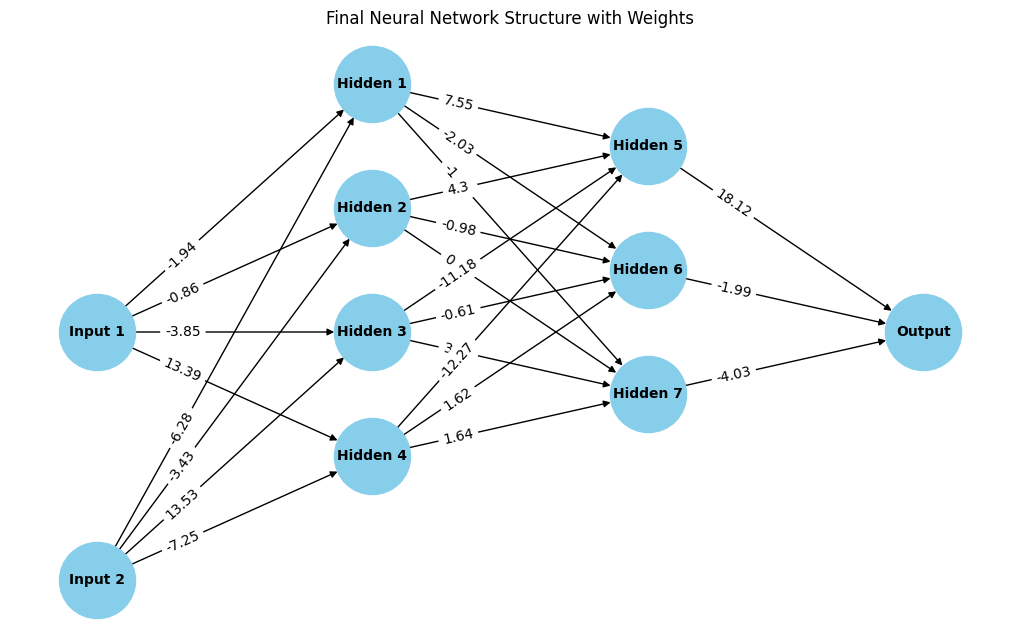

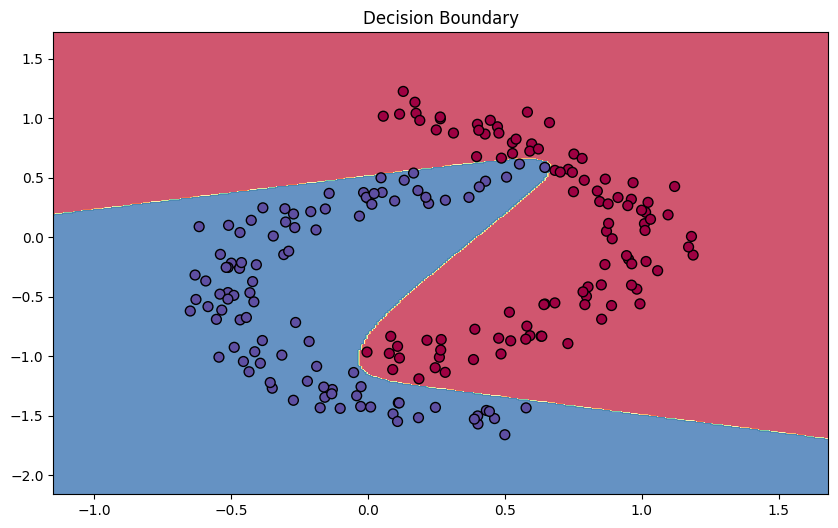

In [21]:
# Final network structure visualization
G = nx.DiGraph()

# Add nodes (make sure the node count matches hidden layers size)
G.add_node("Input 1")
G.add_node("Input 2")
G.add_node("Hidden 1")
G.add_node("Hidden 2")
G.add_node("Hidden 3")
G.add_node("Hidden 4")
G.add_node("Hidden 5")
G.add_node("Hidden 6")
G.add_node("Hidden 7")
G.add_node("Output")

# Add edges with weights (adjust nodes to match network size)
for i in range(input_size):
    for j in range(hidden_size_1):
        G.add_edge(f"Input {i+1}", f"Hidden {j+1}", weight=round(weights_input_hidden1[i, j], 2))

for i in range(hidden_size_1):
    for j in range(hidden_size_2):
        G.add_edge(f"Hidden {i+1}", f"Hidden {j+5}", weight=round(weights_hidden1_hidden2[i, j], 2))

for i in range(hidden_size_2):
    G.add_edge(f"Hidden {i+5}", "Output", weight=round(weights_hidden2_output[i, 0], 2))

# Draw the graph (adjust positions to match all nodes)
pos = {
    "Input 1": (0, 1), "Input 2": (0, 0),
    "Hidden 1": (1, 2), "Hidden 2": (1, 1.5), "Hidden 3": (1, 1), "Hidden 4": (1, 0.5),
    "Hidden 5": (2, 1.75), "Hidden 6": (2, 1.25), "Hidden 7": (2, 0.75),
    "Output": (3, 1)
}
labels = nx.get_edge_attributes(G, 'weight')
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.3, font_size=10, font_color='black')
plt.title("Final Neural Network Structure with Weights")
plt.show()

# Decision boundary visualization
def plot_decision_boundary(X, y, model):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=50, edgecolor='k', cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()

# Decision boundary plotting function
def decision_model(X):
    hidden_layer1_input = np.dot(X, weights_input_hidden1) + bias_hidden1
    hidden_layer1_output = sigmoid(hidden_layer1_input)

    hidden_layer2_input = np.dot(hidden_layer1_output, weights_hidden1_hidden2) + bias_hidden2
    hidden_layer2_output = sigmoid(hidden_layer2_input)

    final_input = np.dot(hidden_layer2_output, weights_hidden2_output) + bias_output
    y_pred = sigmoid(final_input)

    return (y_pred > 0.5).astype(int)

# Plot decision boundary
plot_decision_boundary(X, y, decision_model)
